## Get raw data

In [1]:
import sys
import os

# Get the current working directory (where the notebook is running)
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Get the grandparent directory
grandparent_dir = os.path.dirname(parent_dir)

# Add both the parent and grandparent directories to the system path
sys.path.append(parent_dir)
sys.path.append(grandparent_dir)

from scripts.config import load_config
from scripts.connect import connect
import psycopg2

import pandas as pd
from datetime import datetime

In [2]:
query = """
    SELECT 
        name,
        playlists.track_id AS track_id,
        playlists.track_name AS track_name,
        duration_ms,
        explicit,
        current_popularity,
        acousticness,
        danceability,
        instrumentalness,
        key_signature,
        mode,
        tempo,
        time_signature,
        valence,
        date_released,
        STRING_AGG(artists.artist_id::text, ', ') AS artist_ids,  -- Aggregate artist IDs
        STRING_AGG(artists.artist_name, ', ') AS artist_names    -- Aggregate artist names
    FROM playlists
    JOIN tracks ON playlists.track_id = tracks.track_id
    JOIN albums ON playlists.album_id = albums.album_id
    JOIN trackartists ta ON playlists.track_id = ta.track_id
    JOIN artists ON ta.artist_id = artists.artist_id
    GROUP BY 
        name,
        playlists.track_id,
        playlists.track_name,
        duration_ms,
        explicit,
        current_popularity,
        acousticness,
        danceability,
        instrumentalness,
        key_signature,
        mode,
        tempo,
        time_signature,
        valence,
        date_released
    """
# Connect to the PostgreSQL database
config=load_config(filename="../../../database.ini")
connection = connect(config)
cursor = connection.cursor()
# Execute the query with the provided parameter
cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [desc[0] for desc in cursor.description]

# Load the data into a Pandas DataFrame
global_df = pd.DataFrame(rows, columns=columns)

# Close the connection
cursor.close()
connection.close()

global_df

---- Successfully connected to PostgreSQL Server ----



,name,track_id,track_name,duration_ms,explicit,current_popularity,acousticness,danceability,instrumentalness,key_signature,mode,tempo,time_signature,valence,date_released,artist_ids,artist_names
0,Top 50 - Argentina,03IpZ9yqJlo3EIgDQUgBSF,Nueva Era,217547,True,82,0.2670,0.556,0.000000,0,1,101.097,3.0,0.681,2024-10-31,"1bAftSH8umNcGZ0uyV7LMg, 7iK8PXO48WeuP03g8YR51W","Duki, Myke Towers"
1,Top 50 - Argentina,0CgpCtEPvyDizcg2p47VrU,A las Nueve,207533,False,70,0.2360,0.625,0.000082,4,0,129.931,4.0,0.827,2012-10-18,4ZDoy7AWNgQVmX7T0u0B1j,No Te Va Gustar
2,Top 50 - Argentina,0Cs2ANiGsCOQLKnCrNJ6hA,La_Playlist.mpeg,149571,False,72,0.0184,0.753,0.000000,5,0,139.949,4.0,0.891,2024-06-20,0AqlFI0tz2DsEoJlKSIiT9,Emilia
3,Top 50 - Argentina,0EVxchTHYIgx618OrpcrdQ,AGORA,153564,False,78,0.2540,0.686,0.000206,4,0,169.857,4.0,0.626,2024-09-12,1DxLCyH42yaHKGK3cl5bvG,Maria Becerra
4,Top 50 - Argentina,0SoBfYjQHvL6cuWHtPUYnq,Hoy,198495,False,79,0.2400,0.451,0.000000,11,1,176.161,4.0,0.661,2024-05-22,"55ru5B05MMBunM1tvH7Di6, 4oZolC0sCwCAKqsNXfRlVS","Valentino Merlo, The La Planta"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Viral 50 - Andorra,6mnfGyPzbzSe8olYGM44pU,Luna llena,169846,False,76,0.6210,0.674,0.000022,2,1,62.344,4.0,0.741,2024-02-15,22dFwJoRBV51ue5TGnC7Dt,Beny Jr
3796,Viral 50 - Andorra,6onnX1hYWcqP2dXgfvExNG,Dame La Verde,215920,True,72,0.6120,0.480,0.000005,6,1,82.877,4.0,0.646,2024-09-19,"2YRyPiW98bpkARAS4B3OQP, 4axKuDPr6WKcDCyh8vueTY","Dei V, Luar La L"
3797,Viral 50 - Andorra,6vRQqxOhUFd78p5tL8jXr7,La Morocha,134144,False,68,0.0973,0.756,0.000000,7,1,149.109,4.0,0.973,2024-02-02,"4kcQWQDK0u9AftVSpdrAgk, 5TP8Ubo4jLKEi4Mw2O8fAk","Luck Ra, BM"
3798,Viral 50 - Andorra,79j3Cl3AEAEhXK9cjjfd02,RAPAPA,120888,False,71,0.5660,0.839,0.047400,11,0,135.020,4.0,0.821,2024-10-18,0FwnPHExlRRxEZPLAi5tmG,JC Reyes


## Clean Data

In [3]:
# CLEANING & FEAT ENG

track_features_columns = ['name','track_id','track_name',
                          'duration_ms','explicit','current_popularity',
                          'acousticness','danceability', 'instrumentalness',
                          'key_signature', 'mode', 'tempo',
                          'time_signature','valence','date_released']

track_features_df = global_df[track_features_columns].drop_duplicates() # remove dupes

# add age column
track_features_df['age']=((datetime.today()-pd.to_datetime(track_features_df['date_released'], format='mixed')).dt.days)//364.25

# add number of countries column
track_name_counts = track_features_df.groupby('track_id')['name'].nunique().reset_index() # group by 'track_id' and count unique 'name' values
track_name_counts.columns = ['track_id', 'country_count'] # rename the count column
track_features_df = track_features_df.merge(track_name_counts, on='track_id', how='left') # merge counts back into the original df

# make mode numerical
track_features_df['mode']=track_features_df['mode'].apply(int)

In [4]:
num_features_df=track_features_df.drop(['name','track_name','date_released'],axis=1)
num_features_df=num_features_df.drop_duplicates()

num_features_df['key_signature']=num_features_df['key_signature'].apply(str) 
num_features_df.set_index(['track_id'], inplace=True) # preserve id as index

# encode categorical
encoded_columns = ['key_signature', 'time_signature']
encoded_df = pd.get_dummies(num_features_df, columns=encoded_columns, drop_first=False)

## Cluster

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
features_df=encoded_df.copy()

# scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_df)

# PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

''' # KMEANS
# optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)




# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 3: Choose the number of clusters (e.g., 3) and fit KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
'''

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your dataset
clusters = dbscan.fit_predict(pca_df)

cluster_df = features_df.copy()
cluster_df['cluster'] = clusters
pca_df['cluster']=clusters

# Display the DataFrame with cluster assignments
cluster_df

,duration_ms,explicit,current_popularity,acousticness,danceability,instrumentalness,mode,tempo,valence,age,...,key_signature_5,key_signature_6,key_signature_7,key_signature_8,key_signature_9,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,cluster
track_id,,,,,,,,,,,,,,,,,,,,,
03IpZ9yqJlo3EIgDQUgBSF,217547,True,82,0.2670,0.556,0.000000,1,101.097,0.681,0.0,...,False,False,False,False,False,False,True,False,False,0
0CgpCtEPvyDizcg2p47VrU,207533,False,70,0.2360,0.625,0.000082,0,129.931,0.827,12.0,...,False,False,False,False,False,False,False,True,False,1
0Cs2ANiGsCOQLKnCrNJ6hA,149571,False,72,0.0184,0.753,0.000000,0,139.949,0.891,0.0,...,True,False,False,False,False,False,False,True,False,1
0EVxchTHYIgx618OrpcrdQ,153564,False,78,0.2540,0.686,0.000206,0,169.857,0.626,0.0,...,False,False,False,False,False,False,False,True,False,1
0SoBfYjQHvL6cuWHtPUYnq,198495,False,79,0.2400,0.451,0.000000,1,176.161,0.661,0.0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5s6wqK03tr6rzkT9qMFB1D,216146,False,69,0.2000,0.737,0.000021,0,100.000,0.493,0.0,...,False,False,False,True,False,False,False,True,False,1
63rRgkllF0FDeZ9fpOkFKl,168711,True,76,0.2850,0.544,0.000000,1,132.942,0.398,0.0,...,False,False,False,True,False,False,True,False,False,0
6QgjcU0zLnzq5OrUoSZ3OK,163253,False,81,0.0417,0.801,0.000113,0,79.028,0.754,7.0,...,False,False,False,False,False,False,False,True,False,1


## PCA

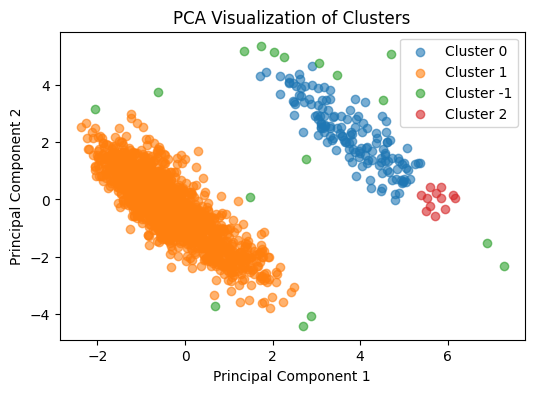

In [8]:
# Step 2: Plot the clusters
plt.figure(figsize=(6, 4))

# Use a scatter plot for each cluster
for cluster in pca_df['cluster'].unique():
    cluster_points = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}', alpha=0.6)

# Add plot details
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Heatmap

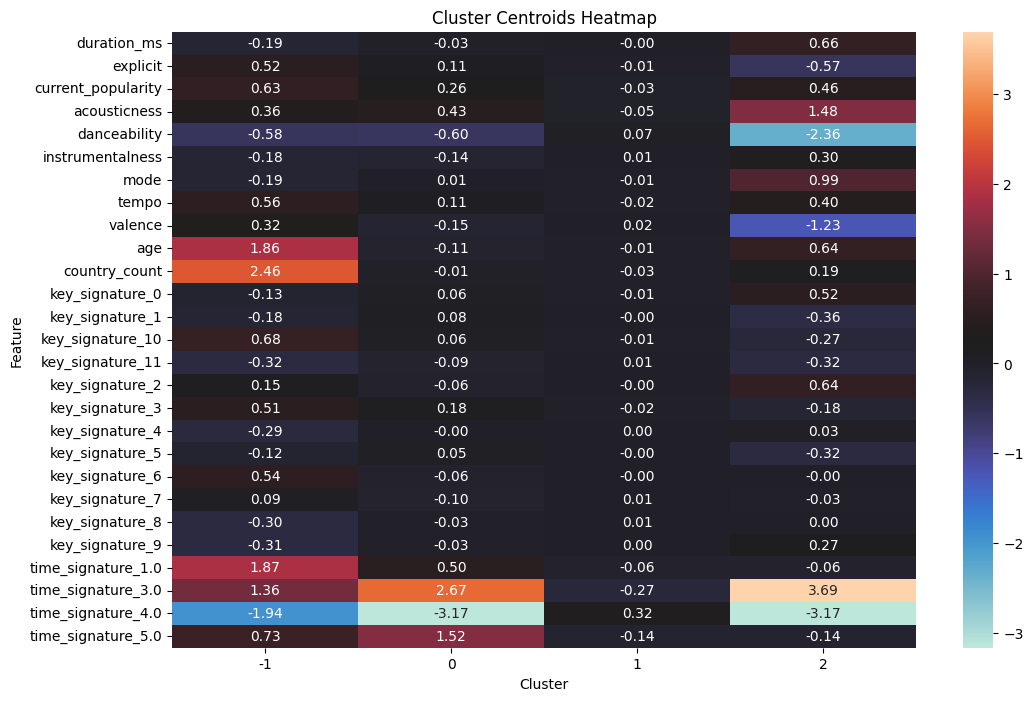

In [9]:
import seaborn as sns
import numpy as np

scaled_df = pd.DataFrame(scaled_data, columns=features_df.columns)
scaled_df['cluster']=clusters

# Step 1: Calculate centroids for each cluster in the original scaled space
centroids = scaled_df.groupby('cluster').mean()

# Step 2: Create a heatmap of the centroids
plt.figure(figsize=(12, 8))
sns.heatmap(centroids.T, cmap='icefire', annot=True, fmt=".2f")
plt.title('Cluster Centroids Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


## Ranking

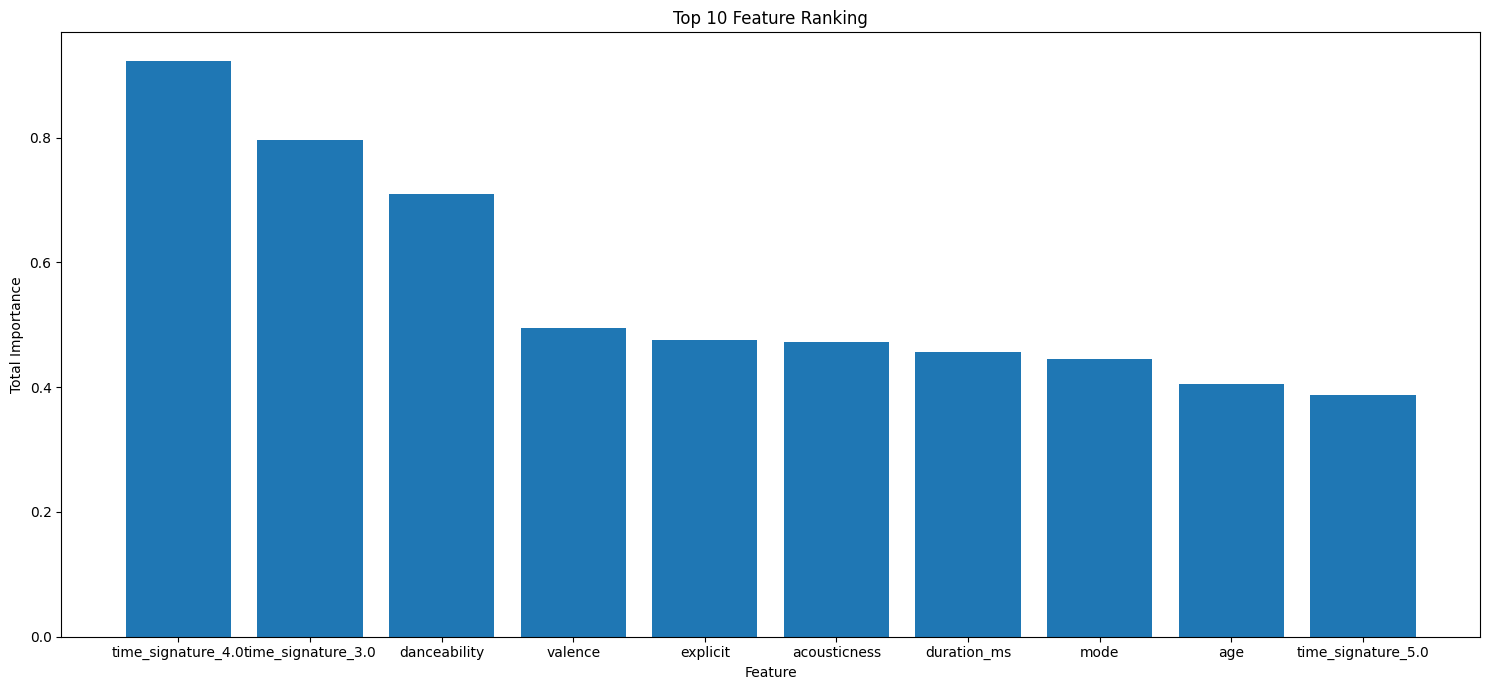

In [10]:
# Perform PCA
pca = PCA(n_components=2)  # Adjust components as needed
pca.fit(scaled_data)

# Get the feature importance (loading scores)
loading_scores = np.abs(pca.components_)

# Create a DataFrame for loading scores
feature_ranking = pd.DataFrame(loading_scores.T, index=features_df.columns, columns=[f'PC{i+1}' for i in range(pca.n_components)])

# Add an overall ranking by summing absolute contributions across PCs
feature_ranking['Total_Importance'] = feature_ranking.sum(axis=1)

# Sort features by overall importance
feature_ranking_sorted = feature_ranking.sort_values(by='Total_Importance', ascending=False)

feature_ranking_top10=feature_ranking_sorted.head(10)

# Display the ranked features
plt.figure(figsize=(15,7))
plt.bar(feature_ranking_top10.index, feature_ranking_top10['Total_Importance'])
plt.title('Top 10 Feature Ranking')
plt.xlabel('Feature')
plt.ylabel('Total Importance')
plt.tight_layout()

In [11]:
track_features_df

,name,track_id,track_name,duration_ms,explicit,current_popularity,acousticness,danceability,instrumentalness,key_signature,mode,tempo,time_signature,valence,date_released,age,country_count
0,Top 50 - Argentina,03IpZ9yqJlo3EIgDQUgBSF,Nueva Era,217547,True,82,0.2670,0.556,0.000000,0,1,101.097,3.0,0.681,2024-10-31,0.0,7
1,Top 50 - Argentina,0CgpCtEPvyDizcg2p47VrU,A las Nueve,207533,False,70,0.2360,0.625,0.000082,4,0,129.931,4.0,0.827,2012-10-18,12.0,2
2,Top 50 - Argentina,0Cs2ANiGsCOQLKnCrNJ6hA,La_Playlist.mpeg,149571,False,72,0.0184,0.753,0.000000,5,0,139.949,4.0,0.891,2024-06-20,0.0,1
3,Top 50 - Argentina,0EVxchTHYIgx618OrpcrdQ,AGORA,153564,False,78,0.2540,0.686,0.000206,4,0,169.857,4.0,0.626,2024-09-12,0.0,3
4,Top 50 - Argentina,0SoBfYjQHvL6cuWHtPUYnq,Hoy,198495,False,79,0.2400,0.451,0.000000,11,1,176.161,4.0,0.661,2024-05-22,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,Viral 50 - Andorra,6mnfGyPzbzSe8olYGM44pU,Luna llena,169846,False,76,0.6210,0.674,0.000022,2,1,62.344,4.0,0.741,2024-02-15,0.0,2
3796,Viral 50 - Andorra,6onnX1hYWcqP2dXgfvExNG,Dame La Verde,215920,True,72,0.6120,0.480,0.000005,6,1,82.877,4.0,0.646,2024-09-19,0.0,1
3797,Viral 50 - Andorra,6vRQqxOhUFd78p5tL8jXr7,La Morocha,134144,False,68,0.0973,0.756,0.000000,7,1,149.109,4.0,0.973,2024-02-02,0.0,2
3798,Viral 50 - Andorra,79j3Cl3AEAEhXK9cjjfd02,RAPAPA,120888,False,71,0.5660,0.839,0.047400,11,0,135.020,4.0,0.821,2024-10-18,0.0,1


In [31]:
#

num_features_df

,duration_ms,explicit,current_popularity,acousticness,danceability,instrumentalness,key_signature,mode,tempo,time_signature,valence,age,country_count
track_id,,,,,,,,,,,,,
03IpZ9yqJlo3EIgDQUgBSF,217547,True,82,0.2670,0.556,0.000000,0,1,101.097,3.0,0.681,0.0,7
0CgpCtEPvyDizcg2p47VrU,207533,False,70,0.2360,0.625,0.000082,4,0,129.931,4.0,0.827,12.0,2
0Cs2ANiGsCOQLKnCrNJ6hA,149571,False,72,0.0184,0.753,0.000000,5,0,139.949,4.0,0.891,0.0,1
0EVxchTHYIgx618OrpcrdQ,153564,False,78,0.2540,0.686,0.000206,4,0,169.857,4.0,0.626,0.0,3
0SoBfYjQHvL6cuWHtPUYnq,198495,False,79,0.2400,0.451,0.000000,11,1,176.161,4.0,0.661,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5s6wqK03tr6rzkT9qMFB1D,216146,False,69,0.2000,0.737,0.000021,8,0,100.000,4.0,0.493,0.0,1
63rRgkllF0FDeZ9fpOkFKl,168711,True,76,0.2850,0.544,0.000000,8,1,132.942,3.0,0.398,0.0,1
6QgjcU0zLnzq5OrUoSZ3OK,163253,False,81,0.0417,0.801,0.000113,1,0,79.028,4.0,0.754,7.0,1
